In [89]:
from scipy.optimize import basinhopping
from math import sin, cos, pi
import pandas as pd

In [58]:
def func(x):
    Keff1=0.38*10**6
    Keff2=0.38*10**6   
    t=10**(-9)
    Jrkky= 1.005e-4
    Jex=0.1E-4
    Ms=1400*10**3
    Extfield=150
    y = Keff1*t*(sin(x[0]))**2+Keff2*t*(sin(x[1]))**2+Jrkky*cos(x[1]-x[0])-Extfield/1000*(Ms*t*cos(x[2]-x[0])+Ms*t*cos(x[2]-x[1]))
    return y

In [82]:
x0 = [0.0, pi, 0.0]
xmin = [0., 0., 0.]
xmax = [pi, pi, pi]
bounds = [(low, high) for low, high in zip(xmin, xmax)]
minimizer_kwargs = dict(method="L-BFGS-B", bounds=bounds)
# minimizer_kwargs = dict(method="BFGS")
ret = basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs, niter=10000)
print(ret.x)
print(ret.fun)

[0. 0. 0.]
-0.00031949999999999996


In [111]:
# plot the figure 
Keff1=0.38*10**6
Keff2=0.38*10**6   
t=10**(-9)
Jrkky= 1.005e-4
Jex=0.1E-4
Ms=1400*10**3

x0 = [0.0, pi, 0.0]
xmin = [0., 0., 0.]
xmax = [pi, pi, pi]
bounds = [(low, high) for low, high in zip(xmin, xmax)]
minimizer_kwargs = dict(method="L-BFGS-B", bounds=bounds)

RET = []
Extfield_list = list(range(0,500))
count = 0
for Extfield in Extfield_list:
    func = lambda x: Keff1*t*(sin(x[0]))**2+Keff2*t*(sin(x[1]))**2+Jrkky*cos(x[1]-x[0])-Extfield/1000*(Ms*t*cos(x[2]-x[0])+Ms*t*cos(x[2]-x[1]))
    ret = basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs, niter=1000)
    RET.append(ret.fun)
    count += 1
    if count % 100 == 0:
        print("{} done".format(count))

100 done
200 done
300 done
400 done
500 done


In [112]:
df = pd.DataFrame({"Extfield": Extfield_list, "local_min": RET})

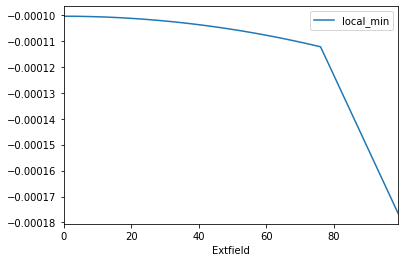

In [113]:
df[:100].plot(kind='line', x='Extfield', y='local_min')